# Modeling

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
# โหลดข้อมูลที่ clean แล้ว
df = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/Stroke Prediction/healthcare-dataset-stroke-data-cleaned.csv')
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4908 entries, 0 to 4907
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4908 non-null   object 
 1   age                4908 non-null   float64
 2   hypertension       4908 non-null   int64  
 3   heart_disease      4908 non-null   int64  
 4   ever_married       4908 non-null   object 
 5   work_type          4908 non-null   object 
 6   Residence_type     4908 non-null   object 
 7   avg_glucose_level  4908 non-null   float64
 8   bmi                4908 non-null   float64
 9   smoking_status     4908 non-null   object 
 10  stroke             4908 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 421.9+ KB


In [9]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4908.000000,4908.000000,4908.000000,4908.000000,4908.00000,4908.000000
mean,42.868810,0.091891,0.049511,105.297402,28.89456,0.042584
std,22.556128,0.288901,0.216954,44.425550,7.85432,0.201937
min,0.080000,0.000000,0.000000,55.120000,10.30000,0.000000
25%,25.000000,0.000000,0.000000,77.067500,23.50000,0.000000
50%,44.000000,0.000000,0.000000,91.680000,28.10000,0.000000
75%,60.000000,0.000000,0.000000,113.495000,33.10000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.60000,1.000000


In [10]:
# ตรวจสอบ na ในข้อมูล
df.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [11]:
# เปลี่ยน data type ของ column
df['hypertension'] = df['hypertension'].astype(str)
df['heart_disease'] = df['heart_disease'].astype(str)
df['stroke'] = df['stroke'].astype(str)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4908 entries, 0 to 4907
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4908 non-null   object 
 1   age                4908 non-null   float64
 2   hypertension       4908 non-null   object 
 3   heart_disease      4908 non-null   object 
 4   ever_married       4908 non-null   object 
 5   work_type          4908 non-null   object 
 6   Residence_type     4908 non-null   object 
 7   avg_glucose_level  4908 non-null   float64
 8   bmi                4908 non-null   float64
 9   smoking_status     4908 non-null   object 
 10  stroke             4908 non-null   object 
dtypes: float64(3), object(8)
memory usage: 421.9+ KB


In [13]:
df_cat  = pd.get_dummies(df.select_dtypes('object') , drop_first=True)
df_cat

,gender_Male,hypertension_1,heart_disease_1,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke_1
0,1,0,1,1,0,1,0,0,1,1,0,0,1
1,1,0,1,1,0,1,0,0,0,0,1,0,1
2,0,0,0,1,0,1,0,0,1,0,0,1,1
3,0,1,0,1,0,0,1,0,0,0,1,0,1
4,1,0,0,1,0,1,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4903,0,0,0,0,0,0,0,1,0,0,0,0,0
4904,0,0,0,1,0,0,1,0,1,0,1,0,0
4905,0,0,0,1,0,0,1,0,0,0,1,0,0
4906,1,0,0,1,0,1,0,0,0,1,0,0,0


In [14]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4908 entries, 0 to 4907
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   gender_Male                     4908 non-null   uint8
 1   hypertension_1                  4908 non-null   uint8
 2   heart_disease_1                 4908 non-null   uint8
 3   ever_married_Yes                4908 non-null   uint8
 4   work_type_Never_worked          4908 non-null   uint8
 5   work_type_Private               4908 non-null   uint8
 6   work_type_Self-employed         4908 non-null   uint8
 7   work_type_children              4908 non-null   uint8
 8   Residence_type_Urban            4908 non-null   uint8
 9   smoking_status_formerly smoked  4908 non-null   uint8
 10  smoking_status_never smoked     4908 non-null   uint8
 11  smoking_status_smokes           4908 non-null   uint8
 12  stroke_1                        4908 non-null   uint8
dtypes: 

In [15]:
df_num = df.select_dtypes('number')
df_num

,age,avg_glucose_level,bmi
0,67.0,228.69,36.6
1,80.0,105.92,32.5
2,49.0,171.23,34.4
3,79.0,174.12,24.0
4,81.0,186.21,29.0
...,...,...,...
4903,13.0,103.08,18.6
4904,81.0,125.20,40.0
4905,35.0,82.99,30.6
4906,51.0,166.29,25.6


In [16]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4908 entries, 0 to 4907
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                4908 non-null   float64
 1   avg_glucose_level  4908 non-null   float64
 2   bmi                4908 non-null   float64
dtypes: float64(3)
memory usage: 115.2 KB


In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
df_num_scaler = StandardScaler().fit_transform(df_num)
df_num_scaler

array([[ 1.06993757,  2.77779723,  0.98114481],
       [ 1.64633634,  0.01401584,  0.45908589],
       [ 0.27184695,  1.48426559,  0.70101563],
       ...,
       [-0.34889019, -0.50218118,  0.21715615],
       [ 0.36052369,  1.37305699, -0.41950107],
       [ 0.05015511, -0.45062901, -0.3431022 ]])

In [19]:
df_num_scaler_final = pd.DataFrame(df_num_scaler, columns=df_num.columns, index=df_num.index)
df_num_scaler_final

,age,avg_glucose_level,bmi
0,1.069938,2.777797,0.981145
1,1.646336,0.014016,0.459086
2,0.271847,1.484266,0.701016
3,1.601998,1.549325,-0.623231
4,1.690675,1.821493,0.013426
...,...,...,...
4903,-1.324334,-0.049918,-1.310821
4904,1.690675,0.448045,1.414072
4905,-0.348890,-0.502181,0.217156
4906,0.360524,1.373057,-0.419501


In [20]:
df_final = pd.concat([df_num_scaler_final, df_cat],axis=1) # axis=1 จะเป็นการต่อในแนวนอน
df_final

,age,avg_glucose_level,bmi,gender_Male,hypertension_1,heart_disease_1,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke_1
0,1.069938,2.777797,0.981145,1,0,1,1,0,1,0,0,1,1,0,0,1
1,1.646336,0.014016,0.459086,1,0,1,1,0,1,0,0,0,0,1,0,1
2,0.271847,1.484266,0.701016,0,0,0,1,0,1,0,0,1,0,0,1,1
3,1.601998,1.549325,-0.623231,0,1,0,1,0,0,1,0,0,0,1,0,1
4,1.690675,1.821493,0.013426,1,0,0,1,0,1,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4903,-1.324334,-0.049918,-1.310821,0,0,0,0,0,0,0,1,0,0,0,0,0
4904,1.690675,0.448045,1.414072,0,0,0,1,0,0,1,0,1,0,1,0,0
4905,-0.348890,-0.502181,0.217156,0,0,0,1,0,0,1,0,0,0,1,0,0
4906,0.360524,1.373057,-0.419501,1,0,0,1,0,1,0,0,0,1,0,0,0


In [21]:
y = df_final['stroke_1']
X = df_final.drop('stroke_1', axis=1)

In [22]:
y

0       1
1       1
2       1
3       1
4       1
       ..
4903    0
4904    0
4905    0
4906    0
4907    0
Name: stroke_1, Length: 4908, dtype: uint8

In [23]:
X

,age,avg_glucose_level,bmi,gender_Male,hypertension_1,heart_disease_1,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1.069938,2.777797,0.981145,1,0,1,1,0,1,0,0,1,1,0,0
1,1.646336,0.014016,0.459086,1,0,1,1,0,1,0,0,0,0,1,0
2,0.271847,1.484266,0.701016,0,0,0,1,0,1,0,0,1,0,0,1
3,1.601998,1.549325,-0.623231,0,1,0,1,0,0,1,0,0,0,1,0
4,1.690675,1.821493,0.013426,1,0,0,1,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4903,-1.324334,-0.049918,-1.310821,0,0,0,0,0,0,0,1,0,0,0,0
4904,1.690675,0.448045,1.414072,0,0,0,1,0,0,1,0,1,0,1,0
4905,-0.348890,-0.502181,0.217156,0,0,0,1,0,0,1,0,0,0,1,0
4906,0.360524,1.373057,-0.419501,1,0,0,1,0,1,0,0,0,1,0,0


In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.3, random_state=555
)

In [26]:
X_train

,age,avg_glucose_level,bmi,gender_Male,hypertension_1,heart_disease_1,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
2807,-0.304552,-0.034610,-0.228504,0,0,0,1,0,1,0,0,0,0,1,0
3578,-0.969627,0.473933,-0.253970,0,0,0,1,0,1,0,0,1,0,1,0
1659,1.468983,-0.072430,0.268089,0,1,1,1,0,1,0,0,0,0,0,1
1202,-1.013966,-0.196245,1.834265,1,0,0,0,0,1,0,0,1,0,1,0
1508,-1.324334,-0.138840,-0.776029,0,0,0,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,0.715231,0.101812,-0.661431,0,0,0,1,0,1,0,0,1,0,1,0
1430,1.513321,-0.585250,-0.317636,0,0,0,1,0,1,0,0,1,0,0,0
2628,-0.082860,-0.433745,-0.317636,0,0,0,0,0,1,0,0,1,0,1,0
1057,0.981261,2.593875,1.057544,0,0,0,1,0,0,1,0,0,0,0,1


In [27]:
y_train.value_counts()

0    3293
1     142
Name: stroke_1, dtype: int64

In [28]:
X_test

,age,avg_glucose_level,bmi,gender_Male,hypertension_1,heart_disease_1,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
1332,-1.368673,-0.422039,-0.304903,0,0,0,0,0,0,0,1,1,0,0,0
1767,0.537877,-0.941613,-0.139372,0,0,0,1,0,1,0,0,0,0,0,0
236,-0.215875,-0.175759,-0.253970,0,0,0,0,0,1,0,0,0,0,1,0
331,-0.880951,-0.300025,-0.928827,0,0,0,1,0,1,0,0,0,1,0,0
4393,-1.882998,-0.442300,-1.463619,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
988,0.094493,-0.643331,0.026159,1,0,0,1,0,1,0,0,1,0,0,0
3740,-0.260213,0.051386,-0.457701,1,0,0,1,0,0,0,0,0,0,1,0
2595,-1.146981,-0.376565,0.280822,0,0,0,0,1,0,0,0,0,0,1,0
2459,1.646336,-0.053970,-0.279436,0,0,0,1,0,1,0,0,0,0,0,0


In [29]:
y_test.value_counts()

0    1406
1      67
Name: stroke_1, dtype: int64

## Decision Tree

In [30]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(class_weight='balanced')

In [31]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced')

In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score, \
precision_score, recall_score, classification_report

In [33]:
y_pred = clf.predict(X_test)

In [34]:
accuracy_score(y_test, y_pred)

0.9280380176510523

In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1406
           1       0.16      0.13      0.15        67

    accuracy                           0.93      1473
   macro avg       0.56      0.55      0.55      1473
weighted avg       0.92      0.93      0.93      1473



In [36]:
from sklearn.metrics import RocCurveDisplay, roc_auc_score

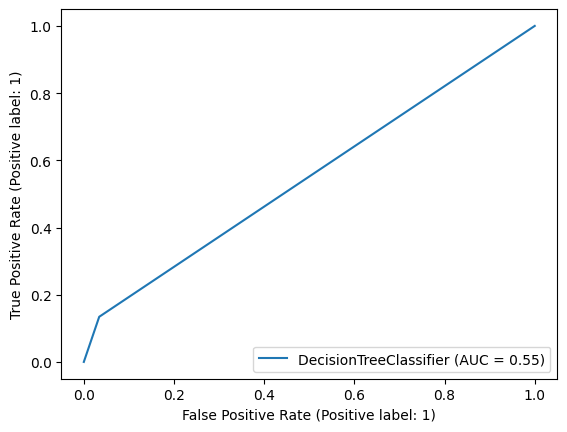

In [37]:
RocCurveDisplay.from_estimator(clf, X_test, y_test)
plt.show()

In [38]:
roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])

0.55009447782425

## Random Forest

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [41]:
scores = []
for n in range(50, 101):
  rf = RandomForestClassifier(n_estimators=n, random_state=555, class_weight='balanced')
  scores.append(cross_val_score(rf, X, y, cv=5).mean())
max_score = max(scores)
max_index = scores.index(max_score)+50
print(max_index, max_score)

74 0.9572127032767179


In [42]:
rf = RandomForestClassifier(n_estimators=74 , random_state=555, class_weight='balanced')

In [43]:
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=74,
                       random_state=555)

In [ ]:
rf.estimators_

In [45]:
predictions = rf.predict(X_test)
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [46]:
from sklearn.metrics import confusion_matrix, accuracy_score, \
precision_score, recall_score, classification_report

In [47]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1406
           1       0.33      0.01      0.03        67

    accuracy                           0.95      1473
   macro avg       0.64      0.51      0.50      1473
weighted avg       0.93      0.95      0.93      1473



In [48]:
importances = rf.feature_importances_
importances

array([3.78918493e-01, 1.94704762e-01, 1.64399034e-01, 2.17762768e-02,
       3.63883916e-02, 2.70270819e-02, 3.94730829e-02, 1.12806841e-04,
       2.22177277e-02, 1.86606785e-02, 1.55643269e-02, 2.69515812e-02,
       1.91767968e-02, 1.88569736e-02, 1.57719868e-02])

In [49]:
Variable_importance = pd.DataFrame(dict(Feature=X.columns,
                  Value=rf.feature_importances_))\
  .sort_values(by='Value', ascending=False)

In [50]:
Variable_importance

,Feature,Value
0,age,0.378918
1,avg_glucose_level,0.194705
2,bmi,0.164399
6,ever_married_Yes,0.039473
4,hypertension_1,0.036388
5,heart_disease_1,0.027027
11,Residence_type_Urban,0.026952
8,work_type_Private,0.022218
3,gender_Male,0.021776
12,smoking_status_formerly smoked,0.019177


In [51]:
from sklearn.metrics import RocCurveDisplay, roc_auc_score

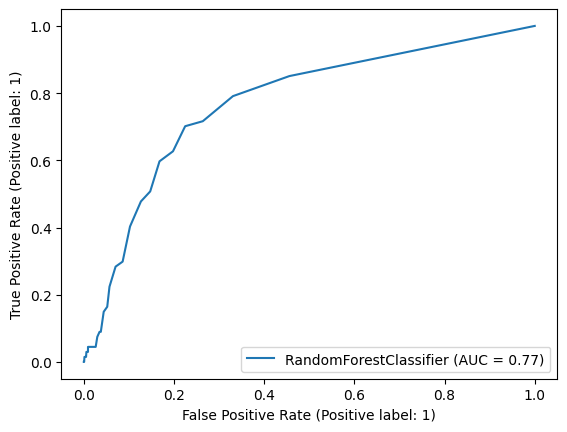

In [52]:
RocCurveDisplay.from_estimator(rf, X_test, y_test)
plt.show()

In [53]:
roc_auc_score(y_test, rf.predict_proba(X_test)[:,1])

0.7712999723997367

## XGBoost

In [59]:
# นับจำนวนตัวอย่างในแต่ละคลาส
count_class_0, count_class_1 = y_train.value_counts()

In [60]:
count_class_0

3293

In [61]:
count_class_1

142

In [62]:
# คำนวณค่า scale_pos_weight
scale_pos_weight = count_class_0 / count_class_1

In [64]:
scale_pos_weight

23.190140845070424

In [63]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(scale_pos_weight = scale_pos_weight)

xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [65]:
y_pred = xgb_model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, \
precision_score, recall_score, classification_report

In [66]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      1406
           1       0.22      0.16      0.19        67

    accuracy                           0.94      1473
   macro avg       0.59      0.57      0.58      1473
weighted avg       0.93      0.94      0.93      1473



In [68]:
from sklearn.metrics import RocCurveDisplay, roc_auc_score

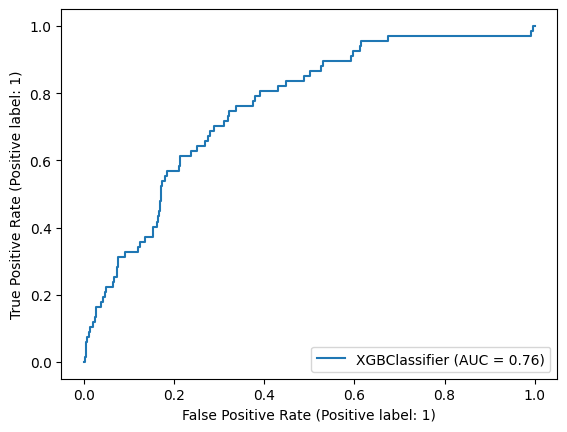

In [71]:
RocCurveDisplay.from_estimator(xgb_model, X_test, y_test)
plt.show()

In [72]:
roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:,1])

0.7598352476592852



---

